In [1]:
import pandas as pd
import numpy as np  
import cv2 as cv
import torch 

In [2]:
torch.cuda.is_available()

True

/home/santenana/miniconda3/envs/Detection/lib/python3.8/site-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,


image 1/1 /home/santenana/Proyectos/02_ObjectDetection/Car_Accident/test/images/car-accident_25_jpg.rf.cc6fc63f9de4bb786d6e90c95968a7c9.jpg: 640x640 1 moderado, 1 severo, 5.2ms
Speed: 5.9ms preprocess, 5.2ms inference, 93.5ms postprocess per image at shape (1, 3, 640, 640)


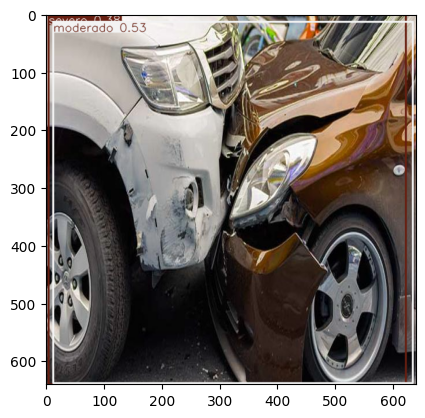

In [2]:
from imagen import imagen_detect
from ultralytics import YOLO
import torch
import matplotlib.pyplot as plt
path = '/home/santenana/Proyectos/02_ObjectDetection/Car_Accident/test/images/car-accident_25_jpg.rf.cc6fc63f9de4bb786d6e90c95968a7c9.jpg'
model_path = "/home/santenana/Proyectos/02_ObjectDetection/best.pt"
model = YOLO(model_path)
img,label = imagen_detect(path,model)
plt.imshow(img)
plt.show()
# print(label[0])

In [4]:
from video_detect import Video
best_model = YOLO("/home/santenana/Proyectos/02_ObjectDetection/best.pt")
path_video = '/home/santenana/Proyectos/02_ObjectDetection/video_accidente.mp4'
label,prob = Video(path_video,best_model)


0: 640x544 (no detections), 78.5ms
Speed: 1.0ms preprocess, 78.5ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 544)

0: 640x544 (no detections), 5.4ms
Speed: 1.9ms preprocess, 5.4ms inference, 0.3ms postprocess per image at shape (1, 3, 640, 544)

0: 640x544 (no detections), 5.0ms
Speed: 1.5ms preprocess, 5.0ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 544)

0: 640x544 (no detections), 6.0ms
Speed: 1.3ms preprocess, 6.0ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 544)

0: 640x544 (no detections), 5.0ms
Speed: 1.3ms preprocess, 5.0ms inference, 0.3ms postprocess per image at shape (1, 3, 640, 544)

0: 640x544 (no detections), 5.0ms
Speed: 1.2ms preprocess, 5.0ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 544)

0: 640x544 (no detections), 7.9ms
Speed: 1.2ms preprocess, 7.9ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 544)

0: 640x544 1 perdida_total, 5.0ms
Speed: 1.2ms preprocess, 5.0ms inference, 1.1m

In [5]:
print(label)
print(prob)

moderado
0.125


In [4]:
best_model = YOLO("/home/santenana/Proyectos/02_ObjectDetection/runs/detect/train12/weights/best.pt")
path_image = "/home/santenana/Proyectos/02_ObjectDetection/Deteccion1.jpg"
from PIL import  Image

def read_image_file(path):
    img = Image.open(path)
    img = img.convert('RGB')
    img_array = np.array(img)
    return img_array

a = read_image_file(path_image)



0: 416x640 (no detections), 12.4ms
Speed: 2.7ms preprocess, 12.4ms inference, 0.9ms postprocess per image at shape (1, 3, 416, 640)
[]


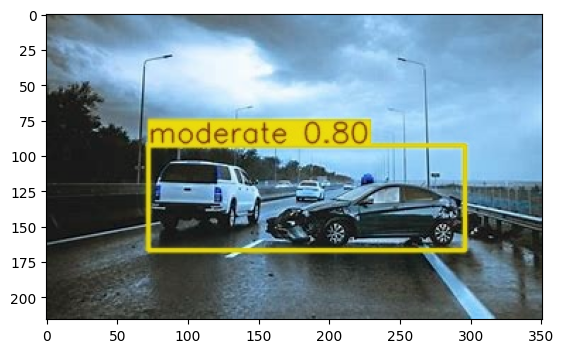

In [13]:

def imagen_detect(a):
    # array = read_image_file(path)
    res = model.predict(a,imgsz=640)
    imagen = res[0].plot()
    labels = res[0].names
    predicted_labels = []
    for result in res:
        for pred in result.boxes:
            label_index = int(pred.cls)
            label = labels[label_index]
            predicted_labels.append(label)
    return imagen,predicted_labels
img,label = imagen_detect(a)
print(label)
plt.imshow(img)
plt.show()


0: 416x640 (no detections), 20.3ms
Speed: 2.9ms preprocess, 20.3ms inference, 0.5ms postprocess per image at shape (1, 3, 416, 640)
[]


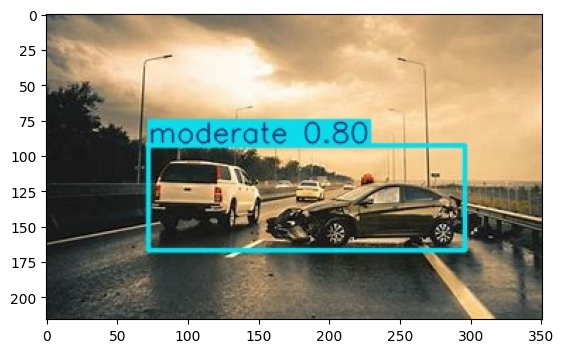

In [13]:
best_model = YOLO("/home/santenana/Proyectos/02_ObjectDetection/runs/detect/train12/weights/best.pt")
path_image = "/home/santenana/Proyectos/02_ObjectDetection/Deteccion4.jpg"
a = read_image_file(path_image)

def imagen_detect(img):
    res = model.predict(img,imgsz=640)
    imagen = res[0].plot()
    labels = res[0].names
    predicted_labels = []
    for result in res:
        for pred in result.boxes:
            label_index = int(pred.cls)
            label = labels[label_index]

            predicted_labels.append(label)
    return imagen,predicted_labels

A, b = imagen_detect(a)
plt.imshow(A)
print(b)